<a href="https://colab.research.google.com/github/vekasheni/CreditCard-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**

 **Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

**Loading the dataset**

In [ ]:
# Loading the dataset
df=pd.read_csv("/content/creditcard.csv")

**Displaying first 10 rows of the dataset**

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Normalized Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.223085
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.357062
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.127440
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.119951
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,-0.091331
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0,-0.353192
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0,-0.347980
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0,-0.206586
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0,0.000313
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0,-0.353153


**Statistical description**

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Normalized Amount
count,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,...,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,4.960900e+04
mean,28803.247193,-0.242479,0.012321,0.692985,0.185186,-0.257016,0.104114,-0.120255,0.053442,0.123490,...,-0.107154,-0.040123,0.007997,0.135954,0.020813,0.004792,0.004533,93.120688,0.002983,2.005200e-17
std,13097.419648,1.885778,1.630608,1.510566,1.400175,1.413057,1.310705,1.283507,1.224245,1.213441,...,0.637733,0.590810,0.594121,0.439067,0.501438,0.388364,0.333225,253.265971,0.054539,1.000010e+00
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000,-3.676831e-01
25%,21734.000000,-0.992814,-0.562958,0.217595,-0.720957,-0.866471,-0.635669,-0.605928,-0.146749,-0.611499,...,-0.529531,-0.179110,-0.322243,-0.127983,-0.330532,-0.063339,-0.006675,7.610000,0.000000,-3.376354e-01
50%,33390.000000,-0.247067,0.079334,0.796997,0.190288,-0.287810,-0.150940,-0.076595,0.058406,0.012150,...,-0.082137,-0.051560,0.061999,0.175766,-0.071826,0.008986,0.022155,25.000000,0.000000,-2.689717e-01
75%,38852.000000,1.155641,0.732318,1.430964,1.067346,0.283513,0.493918,0.424969,0.331555,0.819242,...,0.307262,0.078474,0.401392,0.421960,0.300180,0.083910,0.076342,85.000000,0.000000,-3.206420e-02
max,44134.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000,5.061058e+01


**Info about the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49609 entries, 0 to 49608
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               49609 non-null  int64  
 1   V1                 49609 non-null  float64
 2   V2                 49609 non-null  float64
 3   V3                 49609 non-null  float64
 4   V4                 49609 non-null  float64
 5   V5                 49609 non-null  float64
 6   V6                 49609 non-null  float64
 7   V7                 49609 non-null  float64
 8   V8                 49609 non-null  float64
 9   V9                 49609 non-null  float64
 10  V10                49609 non-null  float64
 11  V11                49609 non-null  float64
 12  V12                49609 non-null  float64
 13  V13                49609 non-null  float64
 14  V14                49609 non-null  float64
 15  V15                49609 non-null  float64
 16  V16                496

**Checking for missing values and dropping them if any**

In [ ]:
# Check for null values
missing_values = df.isnull().sum()

# Drop null values
df=df.dropna()

**Calculate number of genuine and fraud transactions**

In [ ]:
num_genuine = df['Class'].value_counts()[0]
num_fraud = df['Class'].value_counts()[1]
percentage_fraud = (num_fraud / (num_genuine + num_fraud)) * 100
percentage_fraud

0.2983329637767341

**Visualize genuine and fraudulent transactions**



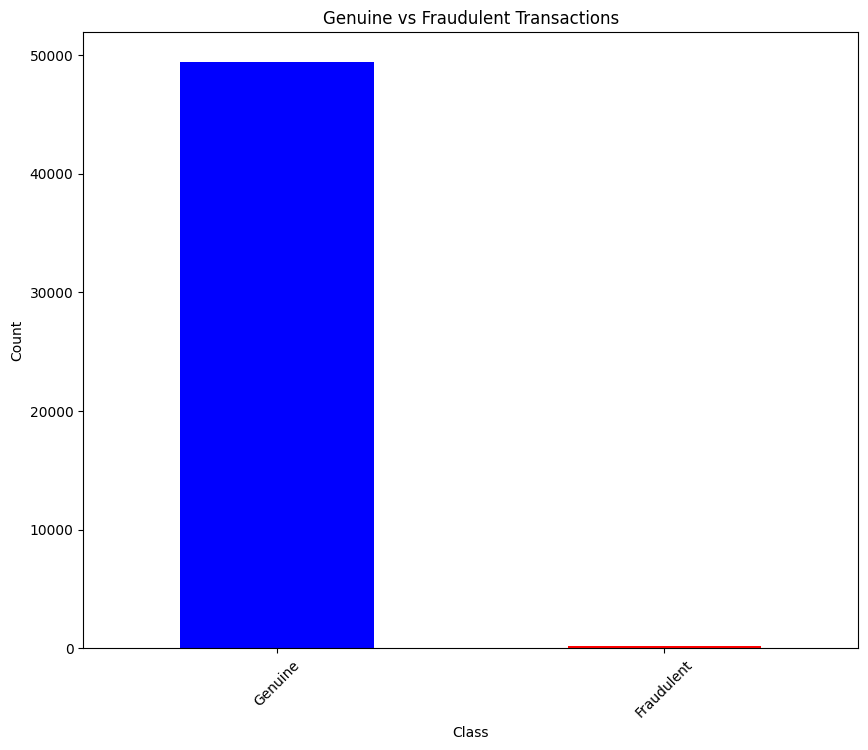

In [40]:
plt.figure(figsize=(10,8))
df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Genuine vs Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Genuine', 'Fraudulent'], rotation=45)
plt.show()

**Normalize the amount column**

  Normalization is a data preprocessing technique that helps improve the performance and accuracy of machine learning algorithms.

In [42]:
scaler = StandardScaler()
df['Normalized Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

**Split dataset into train and test sets**

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Train Decision Tree and Random Forest models**

In [45]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

**Make Predictions**

In [51]:
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

**Compare accuracies**

In [49]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy,rf_accuracy

(0.9987905664180609, 0.999596855472687)

**Performance Matrix Comparison**

In [ ]:
dt_report = classification_report(y_test, dt_predictions)
rf_report = classification_report(y_test, rf_predictions)

print("Number of genuine transactions:", num_genuine)
print("Number of fraud transactions:", num_fraud)
print("Percentage of fraud transactions:", percentage_fraud)
print("\nDecision Tree Model Accuracy:", dt_accuracy)
print("\nRandom Forest Model Accuracy:", rf_accuracy)
print("\nDecision Tree Model Performance:")
print(dt_report)
print("\nRandom Forest Model Performance:")
print(rf_report)

Number of genuine transactions: 49461
Number of fraud transactions: 148
Percentage of fraud transactions: 0.2983329637767341

Decision Tree Model Accuracy: 0.9987905664180609

Random Forest Model Accuracy: 0.999596855472687

Decision Tree Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14836
         1.0       0.81      0.81      0.81        47

    accuracy                           1.00     14883
   macro avg       0.90      0.90      0.90     14883
weighted avg       1.00      1.00      1.00     14883


Random Forest Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14836
         1.0       1.00      0.87      0.93        47

    accuracy                           1.00     14883
   macro avg       1.00      0.94      0.97     14883
weighted avg       1.00      1.00      1.00     14883

